In [1]:
import pandas as pd
import numpy as np
import datetime
data = pd.read_csv("2019_X5_STORES.csv")
le_masque = data['position_name'] == 'Продавец-кассир'
le_masque &= data['is_active_action'] == True
df = data[le_masque]
df_new = df.copy()
df_new

D:\misis\Anaconda\lib\site-packages\IPython\core\interactiveshell.py:3444: DtypeWarning: Columns (6,7) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


,id_applicant,id_partner,id_log,department_id,action_date,stage_name,activity_name,result_name,position_name,is_active_action,is_open_action
0,3571030,3169360,-1,9690,2019-03-25 11:19:30.22263+00,Создание кандидата,NaN,NaN,Продавец-кассир,True,False
1,3557079,3156593,-1,9690,2019-03-20 14:15:12.627618+00,Создание кандидата,NaN,NaN,Продавец-кассир,True,False
2,3533154,3148604,-1,9690,2019-03-13 14:05:24.154745+00,Создание кандидата,NaN,NaN,Продавец-кассир,True,False
3,3506567,2267753,-1,9690,2019-03-04 16:10:11.28085+00,Создание кандидата,NaN,NaN,Продавец-кассир,True,False
4,3481025,3076621,-1,9690,2019-02-23 17:38:34.772531+00,Создание кандидата,NaN,NaN,Продавец-кассир,True,False
...,...,...,...,...,...,...,...,...,...,...,...
6370927,3479558,3108474,-1,5903,2020-04-23 15:38:59.865221+00,Интервью с руководителем,Узнать результаты интервью с руководителем,NaN,Продавец-кассир,True,True
6370928,3447754,3091458,-1,5903,2020-04-23 15:38:59.865221+00,Ожидание,Вернуть в воронку,NaN,Продавец-кассир,True,True
6370929,3442892,3076687,-1,5903,2020-04-23 15:38:59.865221+00,Интервью с руководителем,Узнать результаты интервью с руководителем,NaN,Продавец-кассир,True,True
6370930,3406359,3076584,-1,5903,2020-04-23 15:38:59.865221+00,Интервью с руководителем,Узнать результаты интервью с руководителем,NaN,Продавец-кассир,True,True


In [2]:
def convert(val):
    if val.find(".") == -1:
        if val.find("+") == -1:
            date_time_obj = "Null"
        else:
            val = val[:val.find("+")]
            date_time_obj = datetime.datetime.strptime(val, '%Y-%m-%d %H:%M:%S')
    else:
        val = val[:val.find(".")]
        date_time_obj = datetime.datetime.strptime(val, '%Y-%m-%d %H:%M:%S')
    return date_time_obj

In [3]:
df_new['action_date'] = df_new['action_date'].apply(convert)
df_new = df_new.sort_values(by = ['id_applicant', 'action_date'])
df_new

,id_applicant,id_partner,id_log,department_id,action_date,stage_name,activity_name,result_name,position_name,is_active_action,is_open_action
112200,3330764,1945965,-1,43730,2019-01-03 09:08:42,Создание кандидата,NaN,NaN,Продавец-кассир,True,False
945704,3330764,1945965,17153661,43730,2019-01-03 09:09:01,Обработка,Провести первичную обработку,Подходит,Продавец-кассир,True,False
945705,3330764,1945965,17153662,43730,2019-01-03 09:09:02,Обработка,Проверка формы обращения,Не резерв,Продавец-кассир,True,False
945703,3330764,1945965,17153663,43730,2019-01-03 09:09:27,Интервью с руководителем,Назначить интервью с руководителем,Встреча назначена,Продавец-кассир,True,False
945700,3330764,1945965,17184864,43730,2019-01-09 16:44:58,Интервью с руководителем,Узнать результаты интервью с руководителем,Нет обратной связи,Продавец-кассир,True,False
...,...,...,...,...,...,...,...,...,...,...,...
859590,4461737,3666179,-1,9329,2019-12-31 15:59:37,Создание кандидата,NaN,NaN,Продавец-кассир,True,False
696938,4461738,3666180,-1,47357,2019-12-31 15:59:39,Создание кандидата,NaN,NaN,Продавец-кассир,True,False
1234625,4461738,3666180,26761529,47357,2020-03-31 12:22:56,Не прошел СБ,Вывести из черного списка,В белый список,Продавец-кассир,True,False
818703,4461742,3194598,-1,36270,2019-12-31 16:33:01,Создание кандидата,NaN,NaN,Продавец-кассир,True,False


In [53]:
parthner_array1 = df_new[((df_new['result_name'] == 'Принят') & (df_new['stage_name'] == 'Оформление'))]['id_applicant'].unique() 
parthner_array2 = df_new[(df_new['stage_name'] == 'Выход на работу') & (df_new['result_name'] == 'Принят')]['id_applicant'].unique()
parthner_array=np.concatenate((parthner_array1, parthner_array2), axis=None)
# время найма по заявкам
tth = pd.DataFrame(columns=('Обработка', 'Интервью с руководителем', 'СБ', 'Оформление'))
doubleT = []
for i in parthner_array:
    parthner = df_new[df_new['id_applicant'] == i]
    
    if len(parthner[parthner['stage_name'] == 'Обработка']['action_date'])!=0:
        if  (max(parthner[parthner['stage_name'] == 'Обработка']['action_date']) >  min(parthner[(parthner['stage_name'] == 'Оформление')]['action_date'])):
            doubleT.append(i)
        else:
            if len(parthner[parthner['stage_name'] == 'Обработка']['action_date'])!=0:
                if len(parthner[parthner['stage_name'] == 'Создание кандидата']['action_date'])!=0:
                    treatment = max(parthner[parthner['stage_name'] == 'Обработка']['action_date']) - min(parthner[parthner['stage_name'] == 'Создание кандидата']['action_date'])
                else:
                    treatment = max(parthner[parthner['stage_name'] == 'Обработка']['action_date']) - min(parthner[parthner['stage_name'] == 'Обработка']['action_date'])   
            else:
                treatment = None

            if len(parthner[parthner['stage_name'] == 'Интервью с руководителем']['action_date'])!=0:
                interview = max(parthner[parthner['stage_name'] == 'Интервью с руководителем']['action_date'])- min(parthner[parthner['stage_name'] == 'Интервью с руководителем']['action_date'])
            else:
                interview = None

            if len(parthner[parthner['stage_name'] == 'СБ']['action_date'])!=0:
                secServ = max(parthner[parthner['stage_name'] == 'СБ']['action_date'])- min(parthner[parthner['stage_name'] == 'СБ']['action_date'])
            else:
                secServ = None

            if (len(parthner[parthner['stage_name'] == 'Оформление']['action_date'])!=0) or len(parthner[(parthner['stage_name'] == 'Выход на работу')]['action_date'])!=0:
                if len(parthner[(parthner['stage_name'] == 'Выход на работу') & (parthner['result_name'] == 'Принят')]['action_date'])!=0:
                    registration = max(parthner[(parthner['stage_name'] == 'Выход на работу') & (parthner['result_name'] == 'Принят')]['action_date'])- min(parthner[parthner['stage_name'] == 'Оформление']['action_date'])
                else:
                    registration = max(parthner[(parthner['stage_name'] == 'Оформление') & (parthner['result_name'] == 'Принят')]['action_date'])- min(parthner[parthner['stage_name'] == 'Оформление']['action_date'])
            else:
                registration = None
            tth.loc[i] = [treatment, interview, secServ, registration]
    else:
            if len(parthner[parthner['stage_name'] == 'Обработка']['action_date'])!=0:
                treatment = max(parthner[parthner['stage_name'] == 'Обработка']['action_date']) - min(parthner[parthner['stage_name'] == 'Создание кандидата']['action_date'])
            else:
                treatment = None

            if len(parthner[parthner['stage_name'] == 'Интервью с руководителем']['action_date'])!=0:
                interview = max(parthner[parthner['stage_name'] == 'Интервью с руководителем']['action_date'])- min(parthner[parthner['stage_name'] == 'Интервью с руководителем']['action_date'])
            else:
                interview = None

            if len(parthner[parthner['stage_name'] == 'СБ']['action_date'])!=0:
                secServ = max(parthner[parthner['stage_name'] == 'СБ']['action_date'])- min(parthner[parthner['stage_name'] == 'СБ']['action_date'])
            else:
                secServ = None

            if (len(parthner[parthner['stage_name'] == 'Оформление']['action_date'])!=0) or len(parthner[(parthner['stage_name'] == 'Выход на работу')]['action_date'])!=0:
                if len(parthner[(parthner['stage_name'] == 'Выход на работу') & (parthner['result_name'] == 'Принят')]['action_date'])!=0:
                    registration = max(parthner[(parthner['stage_name'] == 'Выход на работу') & (parthner['result_name'] == 'Принят')]['action_date'])- min(parthner[parthner['stage_name'] == 'Оформление']['action_date'])
                else:
                    registration = max(parthner[(parthner['stage_name'] == 'Оформление') & (parthner['result_name'] == 'Принят')]['action_date'])- min(parthner[parthner['stage_name'] == 'Оформление']['action_date'])
            else:
                registration = None
            tth.loc[i] = [treatment, interview, secServ, registration]


In [10]:
len(parthner[(parthner['stage_name'] == 'Выход на работу') & (parthner['result_name'] == 'Принят')]['action_date'])

0

In [52]:
parthner

,id_applicant,id_partner,id_log,department_id,action_date,stage_name,activity_name,result_name,position_name,is_active_action,is_open_action
1396598,4103193,823979,22266857,10220,2019-09-24 09:20:24,Обработка,Провести первичную обработку,Подходит,Продавец-кассир,True,False
1396597,4103193,823979,22266860,10220,2019-09-24 09:20:26,Обработка,Проверка формы обращения,Не резерв,Продавец-кассир,True,False
1396596,4103193,823979,22266865,10220,2019-09-24 09:20:27,Интервью с руководителем,Назначить интервью с руководителем,Встреча назначена,Продавец-кассир,True,False
1396595,4103193,823979,22266867,10220,2019-09-24 09:20:28,Интервью с руководителем,Узнать результаты интервью с руководителем,Подходит,Продавец-кассир,True,False
1396594,4103193,823979,22266869,10220,2019-09-24 09:20:29,СБ,Подготовить анкету кандидата,Подготовлена,Продавец-кассир,True,False
1396592,4103193,823979,22293096,10220,2019-09-25 08:02:03,СБ,Узнать результаты СБ,Подходит,Продавец-кассир,True,False
1396593,4103193,823979,22293097,10220,2019-09-25 08:02:04,СБ,Проверка формы обращения,Не резерв,Продавец-кассир,True,False
1396591,4103193,823979,22318268,10220,2019-09-25 17:41:00,Оформление,Назначить время на оформление/медосмотр,Время назначено,Продавец-кассир,True,False
1396590,4103193,823979,22318382,10220,2019-09-25 17:44:15,Оформление,Узнать результаты приема,В ожидании,Продавец-кассир,True,False
1396589,4103193,823979,22365310,10220,2019-09-27 13:32:10,Оформление,Узнать результаты приема,В ожидании,Продавец-кассир,True,False


In [63]:
parthner_array1 = df_new[((df_new['result_name'] == 'Принят') & (df_new['stage_name'] == 'Оформление'))]['id_applicant'].unique() 
len(parthner_array1)

80980

In [64]:
parthner_array1 = df_new[((df_new['result_name'] == 'Принят') & (df_new['stage_name'] == 'Оформление'))]['id_applicant'].unique() 
parthner_array2 = df_new[(df_new['stage_name'] == 'Выход на работу') & (df_new['result_name'] == 'Принят')]['id_applicant'].unique()
parthner_array=np.concatenate((parthner_array1, parthner_array2), axis=None)

In [65]:
len(parthner_array)

81017

In [56]:
len(doubleT)

18258

In [54]:
tth

,Обработка,Интервью с руководителем,СБ,Оформление
3330795,0 days 00:02:42,5 days 02:35:03,0 days 20:51:54,1 days 01:17:16
3331278,0 days 00:00:26,0 days 00:00:01,1 days 03:28:30,20 days 03:45:12
3331279,0 days 00:00:21,0 days 00:00:01,1 days 03:22:20,4 days 17:19:09
3331283,0 days 00:00:17,0 days 00:00:01,1 days 03:28:25,4 days 23:50:45
3331287,0 days 00:00:14,0 days 00:00:01,1 days 02:55:29,0 days 21:58:55
...,...,...,...,...
3636983,0 days 00:00:13,4 days 20:49:39,0 days 17:15:19,43 days 06:44:56
3651373,0 days 00:00:13,0 days 21:32:43,0 days 18:05:43,25 days 04:12:29
3802426,0 days 00:00:29,0 days 00:00:01,2 days 18:14:40,2 days 03:32:27
3924372,0 days 00:00:20,0 days 00:00:02,0 days 00:00:01,0 days 00:00:08


In [ ]:
tth.drop

In [57]:
NE_SCITAT = tth.isnull()[(tth.isnull()['Обработка']==True) & (tth.isnull()['Интервью с руководителем']==True)& (tth.isnull()['СБ']==True)& (tth.isnull()['Оформление']==False)]
NE_SCITAT

,Обработка,Интервью с руководителем,СБ,Оформление
3385710,True,True,True,False
3385734,True,True,True,False
3385754,True,True,True,False
3385796,True,True,True,False
3385798,True,True,True,False
...,...,...,...,...
3392053,True,True,True,False
3392171,True,True,True,False
3393248,True,True,True,False
3393250,True,True,True,False


In [60]:
len(parthner_array.tolist())

81017

In [61]:
len(NE_SCITAT.index.tolist())

283

In [66]:
parthner_array1 = parthner_array.tolist()
NE_SCITAT1 = NE_SCITAT.index.tolist()
for i in NE_SCITAT1:
    if i in parthner_array1:
        parthner_array1.remove(i)
        
len(parthner_array1)

80734

In [67]:
for i in doubleT:
    if i in parthner_array1:
        parthner_array1.remove(i)
        
len(parthner_array1)

62476

In [83]:
tth_ITOG=[]
tth_ITOG = pd.DataFrame(columns=('Time to hire','Обработка', 'Интервью с руководителем', 'СБ', 'Оформление' ))
# время найма по заявкам
doubleT1 = []
for i in parthner_array1:
    parthner = df_new[df_new['id_applicant'] == i]
    
      
    if len(parthner[parthner['stage_name'] == 'Обработка']['action_date'])!=0:
        if  (max(parthner[parthner['stage_name'] == 'Обработка']['action_date']) >  min(parthner[(parthner['stage_name'] == 'Оформление')]['action_date'])):
            doubleT1.append(i)
        else:
            if len(parthner[parthner['stage_name'] == 'Обработка']['action_date'])!=0:
                if len(parthner[parthner['stage_name'] == 'Создание кандидата']['action_date'])!=0:
                    if min(parthner[parthner['stage_name'] == 'Обработка']['action_date']) > max(parthner[parthner['stage_name'] == 'Создание кандидата']['action_date']):
                        time_to_hire = max(parthner[(parthner['result_name'] == 'Принят')]['action_date'])-min(parthner[parthner['stage_name'] == 'Создание кандидата']['action_date'])
                        treatment = max(parthner[parthner['stage_name'] == 'Обработка']['action_date']) - min(parthner[parthner['stage_name'] == 'Создание кандидата']['action_date'])
                    else:
                        time_to_hire = max(parthner[(parthner['result_name'] == 'Принят')]['action_date'])-min(parthner[parthner['stage_name'] == 'Обработка']['action_date'])
                        treatment = max(parthner[parthner['stage_name'] == 'Обработка']['action_date']) - min(parthner[parthner['stage_name'] == 'Обработка']['action_date'])
                else:
                    treatment = max(parthner[parthner['stage_name'] == 'Обработка']['action_date']) - min(parthner[parthner['stage_name'] == 'Обработка']['action_date'])
                    time_to_hire = max(parthner[(parthner['stage_name'] == 'Оформление') & (parthner['result_name'] == 'Принят')]['action_date'])-min(parthner[parthner['stage_name'] == 'Обработка']['action_date'])
            else:
                treatment = None

            if len(parthner[parthner['stage_name'] == 'Интервью с руководителем']['action_date'])!=0:
                interview = max(parthner[parthner['stage_name'] == 'Интервью с руководителем']['action_date'])- min(parthner[parthner['stage_name'] == 'Интервью с руководителем']['action_date'])
            else:
                interview = None

            if len(parthner[parthner['stage_name'] == 'СБ']['action_date'])!=0:
                secServ = max(parthner[parthner['stage_name'] == 'СБ']['action_date'])- min(parthner[parthner['stage_name'] == 'СБ']['action_date'])
            else:
                secServ = None

            if (len(parthner[parthner['stage_name'] == 'Оформление']['action_date'])!=0) or len(parthner[(parthner['stage_name'] == 'Выход на работу')]['action_date'])!=0:
                if len(parthner[(parthner['stage_name'] == 'Выход на работу') & (parthner['result_name'] == 'Принят')]['action_date'])!=0:
                    registration = max(parthner[(parthner['stage_name'] == 'Выход на работу') & (parthner['result_name'] == 'Принят')]['action_date'])- min(parthner[parthner['stage_name'] == 'Оформление']['action_date'])
                else:
                    registration = max(parthner[(parthner['stage_name'] == 'Оформление') & (parthner['result_name'] == 'Принят')]['action_date'])- min(parthner[parthner['stage_name'] == 'Оформление']['action_date'])
            else:
                registration = None
            tth_ITOG.loc[i] = [time_to_hire,treatment,interview,secServ,registration]
    else:
            if len(parthner[parthner['stage_name'] == 'Обработка']['action_date'])!=0:
                if min(parthner[parthner['stage_name'] == 'Обработка']['action_date']) > max(parthner[parthner['stage_name'] == 'Создание кандидата']['action_date']):
                        time_to_hire = max(parthner[(parthner['result_name'] == 'Принят')]['action_date'])-min(parthner[parthner['stage_name'] == 'Создание кандидата']['action_date'])
                        treatment = max(parthner[parthner['stage_name'] == 'Обработка']['action_date']) - min(parthner[parthner['stage_name'] == 'Создание кандидата']['action_date'])
                else:
                        time_to_hire = max(parthner[(parthner['result_name'] == 'Принят')]['action_date'])-min(parthner[parthner['stage_name'] == 'Обработка']['action_date'])
                        treatment = max(parthner[parthner['stage_name'] == 'Обработка']['action_date']) - min(parthner[parthner['stage_name'] == 'Обработка']['action_date'])
            else:
                treatment = None

            if len(parthner[parthner['stage_name'] == 'Интервью с руководителем']['action_date'])!=0:
                interview = max(parthner[parthner['stage_name'] == 'Интервью с руководителем']['action_date'])- min(parthner[parthner['stage_name'] == 'Интервью с руководителем']['action_date'])
            else:
                interview = None

            if len(parthner[parthner['stage_name'] == 'СБ']['action_date'])!=0:
                secServ = max(parthner[parthner['stage_name'] == 'СБ']['action_date'])- min(parthner[parthner['stage_name'] == 'СБ']['action_date'])
            else:
                secServ = None

            if (len(parthner[parthner['stage_name'] == 'Оформление']['action_date'])!=0) or len(parthner[(parthner['stage_name'] == 'Выход на работу')]['action_date'])!=0:
                if len(parthner[(parthner['stage_name'] == 'Выход на работу') & (parthner['result_name'] == 'Принят')]['action_date'])!=0:
                    registration = max(parthner[(parthner['stage_name'] == 'Выход на работу') & (parthner['result_name'] == 'Принят')]['action_date'])- min(parthner[parthner['stage_name'] == 'Оформление']['action_date'])
                else:
                    registration = max(parthner[(parthner['stage_name'] == 'Оформление') & (parthner['result_name'] == 'Принят')]['action_date'])- min(parthner[parthner['stage_name'] == 'Оформление']['action_date'])
            else:
                registration = None
            tth_ITOG.loc[i] = [time_to_hire,treatment,interview,secServ,registration]


In [84]:
tth_ITOG

,Time to hire,Обработка,Интервью с руководителем,СБ,Оформление
3330795,8 days 04:18:12,0 days 00:02:42,5 days 02:35:03,0 days 20:51:54,1 days 01:17:16
3331278,22 days 08:55:39,0 days 00:00:26,0 days 00:00:01,1 days 03:28:30,20 days 03:45:12
3331279,7 days 04:12:22,0 days 00:00:21,0 days 00:00:01,1 days 03:22:20,4 days 17:19:09
3331283,7 days 03:34:11,0 days 00:00:17,0 days 00:00:01,1 days 03:28:25,4 days 23:50:45
3331287,3 days 08:19:41,0 days 00:00:14,0 days 00:00:01,1 days 02:55:29,0 days 21:58:55
...,...,...,...,...,...
3636983,49 days 23:11:04,0 days 00:00:13,4 days 20:49:39,0 days 17:15:19,43 days 06:44:56
3651373,26 days 20:21:11,0 days 00:00:13,0 days 21:32:43,0 days 18:05:43,25 days 04:12:29
3802426,4 days 23:35:03,0 days 00:00:29,0 days 00:00:01,2 days 18:14:40,2 days 03:32:27
3924372,0 days 00:00:35,0 days 00:00:20,0 days 00:00:02,0 days 00:00:01,0 days 00:00:08


[]

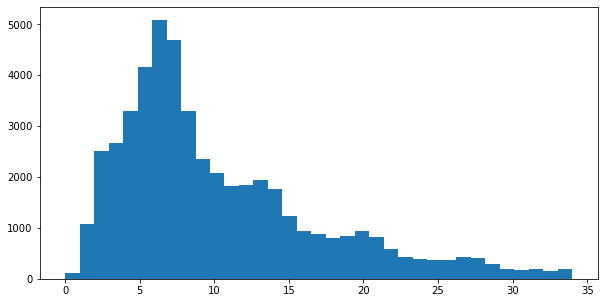

In [124]:
tthDays=[]
for i in tth_ITOG['Time to hire']:
    tthDays.append(i.days)
    
fig, ax = plt.subplots(figsize=(10,5))
ax.hist(tthDays, bins = 35)
ax.plot()

In [126]:
tth_ITOG.describe()

,Time to hire,Обработка,Интервью с руководителем,СБ,Оформление
count,49312,49264,49283,49244,49312
mean,10 days 12:11:35.247931538,0 days 05:03:42.886164339,0 days 20:32:01.978146622,0 days 18:25:57.438469661,7 days 11:31:00.089592796
std,7 days 00:42:58.572599117,1 days 21:15:32.281243993,3 days 08:35:45.167125419,2 days 05:46:22.973481730,6 days 16:11:32.911433872
min,0 days 08:22:14,0 days 00:00:00,0 days 00:00:00,0 days 00:00:00,0 days 00:00:00
25%,5 days 19:29:55.500000,0 days 00:00:17,0 days 00:00:01,0 days 03:20:10.750000,2 days 18:35:02.500000
50%,8 days 02:44:13.500000,0 days 00:00:22,0 days 00:00:01,0 days 04:43:31,5 days 23:10:57.500000
75%,14 days 00:10:58.750000,0 days 00:00:31,0 days 00:00:02,0 days 18:15:29.250000,10 days 06:10:44.750000
max,34 days 23:59:16,34 days 23:07:13,350 days 22:56:44,49 days 19:12:13,71 days 02:49:52


In [120]:
delta_TTH = datetime.timedelta(days=35, 
                           seconds=0, 
                           microseconds=0, 
                           milliseconds=0, 
                           minutes=0, 
                           hours=0, 
                           weeks=0)

In [121]:
tth_ITOG = tth_ITOG2[tth_ITOG2['Time to hire'] < delta_TTH]

In [122]:
tth_ITOG

,Time to hire,Обработка,Интервью с руководителем,СБ,Оформление
3330795,8 days 04:18:12,0 days 00:02:42,5 days 02:35:03,0 days 20:51:54,1 days 01:17:16
3331278,22 days 08:55:39,0 days 00:00:26,0 days 00:00:01,1 days 03:28:30,20 days 03:45:12
3331279,7 days 04:12:22,0 days 00:00:21,0 days 00:00:01,1 days 03:22:20,4 days 17:19:09
3331283,7 days 03:34:11,0 days 00:00:17,0 days 00:00:01,1 days 03:28:25,4 days 23:50:45
3331287,3 days 08:19:41,0 days 00:00:14,0 days 00:00:01,1 days 02:55:29,0 days 21:58:55
...,...,...,...,...,...
3556362,4 days 23:31:19,0 days 00:00:26,0 days 00:00:01,0 days 20:29:16,3 days 02:30:15
3561624,6 days 01:37:48,0 days 00:00:54,1 days 00:46:41,0 days 23:15:23,1 days 22:21:20
3651373,26 days 20:21:11,0 days 00:00:13,0 days 21:32:43,0 days 18:05:43,25 days 04:12:29
3802426,4 days 23:35:03,0 days 00:00:29,0 days 00:00:01,2 days 18:14:40,2 days 03:32:27


In [114]:
df_new[df_new['id_applicant']==4063959]

,id_applicant,id_partner,id_log,department_id,action_date,stage_name,activity_name,result_name,position_name,is_active_action,is_open_action
8117,4063959,3440856,-1,12904,2019-09-11 13:00:06,Создание кандидата,NaN,NaN,Продавец-кассир,True,False
1344068,4063959,3440856,21984958,12904,2019-09-11 13:00:17,Обработка,Провести первичную обработку,Подходит,Продавец-кассир,True,False
1344069,4063959,3440856,21984960,12904,2019-09-11 13:00:18,Обработка,Проверка формы обращения,Не резерв,Продавец-кассир,True,False
1344067,4063959,3440856,21984983,12904,2019-09-11 13:00:27,Интервью с руководителем,Назначить интервью с руководителем,Встреча назначена,Продавец-кассир,True,False
1344066,4063959,3440856,22020081,12904,2019-09-12 15:25:23,Интервью с руководителем,Узнать результаты интервью с руководителем,Нет обратной связи,Продавец-кассир,True,False
1344065,4063959,3440856,22029426,12904,2019-09-12 21:33:03,Интервью с руководителем,Узнать результаты интервью с руководителем,Подходит,Продавец-кассир,True,False
1344064,4063959,3440856,22029427,12904,2019-09-12 21:33:05,СБ,Подготовить анкету кандидата,Подготовлена,Продавец-кассир,True,False
1344062,4063959,3440856,22040316,12904,2019-09-13 12:12:06,СБ,Узнать результаты СБ,Подходит,Продавец-кассир,True,False
1344063,4063959,3440856,22040317,12904,2019-09-13 12:12:07,СБ,Проверка формы обращения,Не резерв,Продавец-кассир,True,False
1344061,4063959,3440856,22044315,12904,2019-09-13 13:27:55,Оформление,Назначить время на оформление/медосмотр,Время назначено,Продавец-кассир,True,False


In [85]:
tth_ITOG.describe()

,Time to hire,Обработка,Интервью с руководителем,СБ,Оформление
count,62462,62316,62378,62390,62462
mean,11 days 01:54:31.528033044,0 days 16:19:23.999069259,1 days 10:33:04.981099105,1 days 01:14:37.831206924,6 days 23:19:44.001360827
std,15 days 19:20:42.697730047,6 days 20:45:17.292959070,8 days 17:25:29.195462484,6 days 02:50:12.692353295,9 days 02:59:19.196133011
min,0 days 00:00:07,0 days 00:00:00,0 days 00:00:00,0 days 00:00:00,0 days 00:00:00
25%,3 days 05:46:35,0 days 00:00:17,0 days 00:00:01,0 days 02:04:55.250000,0 days 01:47:20
50%,7 days 03:34:03.500000,0 days 00:00:22,0 days 00:00:01,0 days 04:05:35,4 days 21:40:25.500000
75%,13 days 19:51:20.500000,0 days 00:00:32,0 days 00:00:02,0 days 17:53:42,9 days 03:52:28
max,266 days 18:56:01,241 days 00:02:41,350 days 22:56:44,241 days 02:23:02,156 days 20:59:54


In [88]:
delta_TTH = datetime.timedelta(days=0, 
                           seconds=0, 
                           microseconds=0, 
                           milliseconds=0, 
                           minutes=0, 
                           hours=8, 
                           weeks=0)
tth_ITOG2 = tth_ITOG
tth_ITOG2 = tth_ITOG2.loc[tth_ITOG2['Time to hire'] > delta_TTH]
tth_ITOG2

,Time to hire,Обработка,Интервью с руководителем,СБ,Оформление
3330795,8 days 04:18:12,0 days 00:02:42,5 days 02:35:03,0 days 20:51:54,1 days 01:17:16
3331278,22 days 08:55:39,0 days 00:00:26,0 days 00:00:01,1 days 03:28:30,20 days 03:45:12
3331279,7 days 04:12:22,0 days 00:00:21,0 days 00:00:01,1 days 03:22:20,4 days 17:19:09
3331283,7 days 03:34:11,0 days 00:00:17,0 days 00:00:01,1 days 03:28:25,4 days 23:50:45
3331287,3 days 08:19:41,0 days 00:00:14,0 days 00:00:01,1 days 02:55:29,0 days 21:58:55
...,...,...,...,...,...
3561624,6 days 01:37:48,0 days 00:00:54,1 days 00:46:41,0 days 23:15:23,1 days 22:21:20
3636983,49 days 23:11:04,0 days 00:00:13,4 days 20:49:39,0 days 17:15:19,43 days 06:44:56
3651373,26 days 20:21:11,0 days 00:00:13,0 days 21:32:43,0 days 18:05:43,25 days 04:12:29
3802426,4 days 23:35:03,0 days 00:00:29,0 days 00:00:01,2 days 18:14:40,2 days 03:32:27


In [119]:
tth_ITOG2

,Time to hire,Обработка,Интервью с руководителем,СБ,Оформление
3330795,8 days 04:18:12,0 days 00:02:42,5 days 02:35:03,0 days 20:51:54,1 days 01:17:16
3331278,22 days 08:55:39,0 days 00:00:26,0 days 00:00:01,1 days 03:28:30,20 days 03:45:12
3331279,7 days 04:12:22,0 days 00:00:21,0 days 00:00:01,1 days 03:22:20,4 days 17:19:09
3331283,7 days 03:34:11,0 days 00:00:17,0 days 00:00:01,1 days 03:28:25,4 days 23:50:45
3331287,3 days 08:19:41,0 days 00:00:14,0 days 00:00:01,1 days 02:55:29,0 days 21:58:55
...,...,...,...,...,...
3561624,6 days 01:37:48,0 days 00:00:54,1 days 00:46:41,0 days 23:15:23,1 days 22:21:20
3636983,49 days 23:11:04,0 days 00:00:13,4 days 20:49:39,0 days 17:15:19,43 days 06:44:56
3651373,26 days 20:21:11,0 days 00:00:13,0 days 21:32:43,0 days 18:05:43,25 days 04:12:29
3802426,4 days 23:35:03,0 days 00:00:29,0 days 00:00:01,2 days 18:14:40,2 days 03:32:27


In [89]:
import matplotlib.pyplot as plt

[]

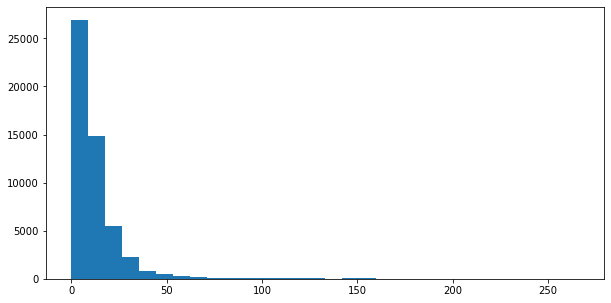

In [90]:
tthDays=[]
for i in tth_ITOG2['Time to hire']:
    tthDays.append(i.days)
    
fig, ax = plt.subplots(figsize=(10,5))
ax.hist(tthDays, bins = 30)
ax.plot()